## MaxCut

In [1]:
from QHyper.problems.maxcut import MaxCutProblem


sample_graph_edges = [(1, 2), (1, 3), (2, 4), (3, 4), (3, 5), (4, 5)]

maxcut_problem = MaxCutProblem(edges=sample_graph_edges)
print(maxcut_problem.objective_function)

{('x0', 'x1'): 2, ('x0', 'x2'): 2, ('x0',): -2, ('x1', 'x3'): 2, ('x1',): -2, ('x2', 'x3'): 2, ('x2', 'x4'): 2, ('x2',): -3, ('x3', 'x4'): 2, ('x3',): -3, ('x4',): -2}


##### DQM

In [2]:
from QHyper.solvers.dqm import DQM


max_cut_dqm = DQM(maxcut_problem, time=5)
max_cut_sampleset = max_cut_dqm.solve()

ValueError: there cannot be a quadratic interaction between two cases in the same variable

In [4]:
res_dqm = max_cut_sampleset.first.sample
print(res_dqm)

{'x0': 0, 'x1': 0, 'x2': 0, 'x3': 0, 'x4': 0}


In [6]:
import networkx as nx
from matplotlib import pyplot as plt


def plot_save_results(
    sampleset_results: dict, maxcut_problem: MaxCutProblem
) -> None:
    plt.cla()

    G = nx.Graph()
    G.add_edges_from(maxcut_problem.edges)
    S0 = [i + 1 for i, val in enumerate(sampleset_results.values()) if val == 0]
    S1 = [i + 1 for i, val in enumerate(sampleset_results.values()) if val == 1]

    lut = {i + 1: val for i, val in enumerate(sampleset_results.values())}
    cut_edges = [(u, v) for u, v in G.edges if lut[u] != lut[v]]
    uncut_edges = [(u, v) for u, v in G.edges if lut[u] == lut[v]]

    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos, nodelist=S0, node_color="r")
    nx.draw_networkx_nodes(G, pos, nodelist=S1, node_color="c")
    nx.draw_networkx_edges(
        G, pos, edgelist=cut_edges, style="dashdot", alpha=0.5, width=3
    )
    nx.draw_networkx_edges(G, pos, edgelist=uncut_edges, style="solid", width=3)
    nx.draw_networkx_labels(G, pos)

    filename = "./demo_output/maxcut_dqm_plot.png"
    plt.savefig(filename, bbox_inches="tight")
    print("\nYour plot is saved to {}".format(filename))
    plt.show()

In [7]:
plot_save_results(res_dqm, maxcut_problem)

NameError: name 'res_dqm' is not defined

### CQM

In [3]:
from QHyper.solvers.cqm import CQM


max_cut_cqm = CQM(maxcut_problem, time=5)
max_cut_samples_cqm = max_cut_cqm.solve()

{'x0': 0.0, 'x1': 1.0, 'x2': 1.0, 'x3': 0.0, 'x4': 0.0, 'x5': 1.0}


NetworkXError: Node 6 has no position.

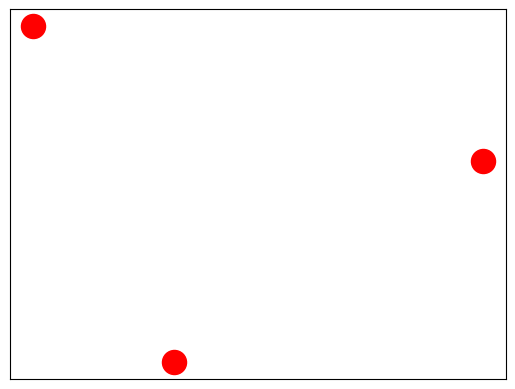

In [8]:
print(max_cut_samples_cqm)
plot_save_results(max_cut_samples_cqm, maxcut_problem)